# Abstract

This report presents an analysis of trends and patterns in UK travel data sourced from the Office for National Statistics (ONS) website. This specific data looks at UK travel, focusing on both inbound and outbound travel - which countries visit the UK, their spend, when they arrive, and both seasonal and non-seasonal adjustment data are available. The same is then repeated for UK residents who travel abroad - which countries they visit, why, when they travel, and seasonally adjusted data.

Through the analysis of seasonally adjusted data, insights are drawn into the preferences and behaviours of UK residents when travelling abroad.

The report concludes by discussing how the findings are important for policymakers, businesses, and analysts. By using both seasonally adjusted and raw data, this study provides a complete picture of international travel trends involving the UK. This information helps decision-makers in the travel industry and beyond make better-informed choices.

# Introduction and Literature Review
In order to gain a broader understanding of the topic prior to the investigation, there were multiple resources available surrounding travel data relating to the COVID-19 pandemic specifically. "On the economic front, albeit temporary, the pandemic’s negative impact on trade was quite significant" (Yepez and Leimgruber, (2024)), which is particularly validated by this research in terms of spending habits both in the UK and globally.

The literature also proved incredibly useful in finding reasons as to why different groups may travel. "... Factors that motivate older people to participate in international retirement migration include: the destination (e.g., climate and amenities), the people (e.g., social networks), the cost (e.g., health insurance and living costs), and the movement (e.g., ease of travel)" (Tate, Snyder and Crooks (2024)). It has allowed for many more factors to be taken into account during the analysis. Despite these articles, there were limitations - such as a lack of literature available relating to time series analysis of COVID-19 data, which highlights the significance of the below work.


In [1]:
# Importing relevant packages for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
!pip install pyspark
sns.set()

In [2]:
from google.colab import drive

# Mounting the Google Drive to allow access to my files.
drive.mount('/content/drive')


# Defining the path to my folder in Google Drive.
excel_file = '/content/drive/MyDrive/TravelDataset.xlsx'

xls = pd.ExcelFile(excel_file)
print(xls.sheet_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Table1', 'Table2', 'Table3', 'Table4', 'Table5']


# Data Contents & Pre-Processing

To pre-process the data, I ensured that all of the data was in a format that was readable by Google Colab. To do this, I exported all of the data to a new spreadsheet, removing all of the additional information such as contents and the cover sheet.

Next, I joined these tables together on their common primary key, "Period", using left joins as to avoid any rows being omitted or deleted.

The data contains:

*   *Table 1*: Visits to the UK by month from other countries, and country of origin
*   *Table 2*: Visits to the UK by month from other countries, and reason for visit
*   *Table 3*: Visits from the UK by month to other countries, and country visited
*   *Table 4*: Visits from the UK by month to other countries, and reason for visit
*   *Table 5*: Spending in the UK, and UK residents spending abroad (in £ millions, by month)

All of this data had to be checked for unavailable or null values. There were multiple nulls discovered in each dataset, which were subsequently replaced by proper NULL values as to make the visualisations easier. If these nulls were not formatted properly, the column would be unable to become an integer value, therefore making visualisation impossible.









In [3]:
# Load the sheets into separate DataFrames
df_sheet1 = pd.read_excel(excel_file, sheet_name='Table1')
df_sheet2 = pd.read_excel(excel_file, sheet_name='Table2')
df_sheet3 = pd.read_excel(excel_file, sheet_name='Table3')
df_sheet4 = pd.read_excel(excel_file, sheet_name='Table4')
df_sheet5 = pd.read_excel(excel_file, sheet_name='Table5')

In [4]:
# Creating a pyspark.sql instance to make joining datasets together much easier.
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [5]:
# Examining the ends of the dataset to ensure no extra rows have been added as a result of loading the datasets.
result = df_sheet1.tail()

print(result)

            Period  North_America   Europe       EU     EU15 Other_EU  \
55     2023 August         659000  2274000  2119000  1773000   345000   
56  2023 September         513000  1968000  1799000  1474000   324000   
57    2023 October         567000  2453000  2225000  1815000   406000   
58   2023 November         372000  1946000  1716000  1360000   347000   
59   2023 December         307000  2107000  1924000  1669000   269000   

    Other_Countries  World_Total Seasonally_Adjusted_World_Total  
55           877000      3810000                   Not available  
56           624000      3106000                   Not available  
57           695000      3715000                   Not available  
58           476000      2795000                   Not available  
59           516000      2931000                   Not available  


In [65]:
# Turning the datasets into Pyspark dataframes for the purpose of pre-processing the data.
spark_df_sheet1 = spark.createDataFrame(df_sheet1)
spark_df_sheet2 = spark.createDataFrame(df_sheet2)
spark_df_sheet3 = spark.createDataFrame(df_sheet3)
spark_df_sheet4 = spark.createDataFrame(df_sheet4)
spark_df_sheet5 = spark.createDataFrame(df_sheet5)

FinancialData = spark_df_sheet5

In [7]:
# Imports necessary functions.
from pyspark.sql.functions import col
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Performs a left join on the "Period" column.
VisitsToUK = spark_df_sheet1.join(spark_df_sheet2, on="Period", how="left")

# Shows the result.
VisitsToUK.show()

+--------------+-------------+-------+-------------+-------------+-------------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|        Period|North_America| Europe|           EU|         EU15|     Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|  Total|Seasonally_Adjusted_Total|
+--------------+-------------+-------+-------------+-------------+-------------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|    2019 April|       319000|2417000|      2192000|      1854000|       345000|         462000|    3199000|                        3200000|1403000|  604000|                       960000|       232000|3199000|                  3200000|
|   2019 August|       593000|2707000|      2499000|    

In [8]:
# Imports necessary functions.
from pyspark.sql.functions import col
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Performs a left join on the "Period" column.
VisitsFromUK = spark_df_sheet3.join(spark_df_sheet4, on="Period", how="left")

# Shows the result.
VisitsFromUK.show()

+--------------+-------------+-------+-------------+-------------+-------------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|        Period|North_America| Europe|           EU|         EU15|     Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|   Total|Seasonally_Adjusted_Total|
+--------------+-------------+-------+-------------+-------------+-------------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|    2019 April|       493000|6252000|      5674000|      4791000|       883000|        1662000|    8406000|                        8010000|5041000|  836000|                      2387000|       143000| 8406000|                  8010000|
|   2019 August|       685000|9346000|      8597000|

Prior to being able to visualise this data, it was important to ensure the 'Period' column was transformed into a datetime type column. This will ensure the ability to perform a time series analysis on the data.

In [67]:
from pyspark.sql.functions import to_date
from pyspark.sql.types import DateType

VisitsToUK = VisitsToUK.withColumn("Period", to_date(VisitsToUK["Period"], "yyyy MMMM").cast(DateType()))
VisitsFromUK = VisitsFromUK.withColumn("Period", to_date(VisitsFromUK["Period"], "yyyy MMMM").cast(DateType()))
FinancialData = FinancialData.withColumn("Period", to_date(FinancialData["Period"], "yyyy MMMM").cast(DateType()))

In [10]:
# Checking and validating that the datatype had been converted correctly to date.
column_types = VisitsToUK.dtypes
for column, data_type in column_types:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Period, Data Type: date
Column: North_America, Data Type: bigint
Column: Europe, Data Type: bigint
Column: EU, Data Type: string
Column: EU15, Data Type: string
Column: Other_EU, Data Type: string
Column: Other_Countries, Data Type: bigint
Column: World_Total, Data Type: bigint
Column: Seasonally_Adjusted_World_Total, Data Type: string
Column: Holiday, Data Type: bigint
Column: Business, Data Type: bigint
Column: Visiting_friends_or_relatives, Data Type: bigint
Column: Miscellaneous, Data Type: bigint
Column: Total, Data Type: bigint
Column: Seasonally_Adjusted_Total, Data Type: string


In [11]:
from pyspark.sql.functions import when

# List of columns in the DataFrame.
columns_to_convert = VisitsToUK.columns

# Converting "Not available" values to NA in all columns.
for column in columns_to_convert:
    VisitsToUK = VisitsToUK.withColumn(column,
                                       when(VisitsToUK[column] == "Not available", None).otherwise(VisitsToUK[column]))

# Verifying the changes.
VisitsToUK.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|  Total|Seasonally_Adjusted_Total|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|2019-04-01|       319000|2417000|2192000|1854000|  345000|         462000|    3199000|                        3200000|1403000|  604000|                       960000|       232000|3199000|                  3200000|
|2019-08-01|       593000|2707000|2499000|2083000|  418000|        1118000|    4418000|                        3530000|2217000|  569000|    

In [12]:
from pyspark.sql.functions import when

# List of columns in the DataFrame.
columns_to_convert = VisitsFromUK.columns

# Converting "Not available" values to NA in all columns.
for column in columns_to_convert:
    VisitsFromUK = VisitsFromUK.withColumn(column,
                                       when(VisitsFromUK[column] == "Not available", None).otherwise(VisitsFromUK[column]))

# Verifying the changes.
VisitsFromUK.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|   Total|Seasonally_Adjusted_Total|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|2019-04-01|       493000|6252000|5674000|4791000|  883000|        1662000|    8406000|                        8010000|5041000|  836000|                      2387000|       143000| 8406000|                  8010000|
|2019-08-01|       685000|9346000|8597000|7254000| 1344000|        1597000|   11628000|                        7780000|8026000|  597000|

In [68]:
from pyspark.sql.functions import when

# List of columns in the DataFrame.
columns_to_convert = FinancialData.columns

# Converting "Not available" values to NA in all columns.
for column in columns_to_convert:
    FinancialData = FinancialData.withColumn(column,
                                       when(FinancialData[column] == "Not Available", None).otherwise(FinancialData[column]))

# Verifying the changes.
FinancialData.show()

+----------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|    Period|Overseas_Residents_Spending_in_UK|Seasonally_Adjusted_Overseas_Residents_Spending_in_UK|UK_Residents_Spending_Abroad|Seasonally_Adjusted_UK_Residents_Spending_Abroad|Balance|Seasonally_Adjusted_Balance|
+----------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|2019-01-01|                             1646|                                                 2140|                        3994|                                            5590|  -2350|                      -3450|
|2019-02-01|                             1318|                                                 2100|                        3356|           

In [24]:
# Casting all the columns to integer types for analysis, except 'Period', which follows the datetime format.

VisitsToUK = VisitsToUK.withColumn("North_America", col("North_America").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Europe", col("Europe").cast("int"))
VisitsToUK = VisitsToUK.withColumn("EU", col("EU").cast("int"))
VisitsToUK = VisitsToUK.withColumn("EU15", col("EU15").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Other_EU", col("Other_EU").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Other_Countries", col("Other_Countries").cast("int"))
VisitsToUK = VisitsToUK.withColumn("World_Total", col("World_Total").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Seasonally_Adjusted_World_Total", col("Seasonally_Adjusted_World_Total").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Other_Countries", col("Other_Countries").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Holiday", col("Holiday").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Business", col("Business").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Visiting_friends_or_relatives", col("Visiting_friends_or_relatives").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Miscellaneous", col("Miscellaneous").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Total", col("Total").cast("int"))
VisitsToUK = VisitsToUK.withColumn("Seasonally_Adjusted_Total", col("Seasonally_Adjusted_Total").cast("int"))

In [25]:
# Casting all the columns to integer types for analysis, except 'Period', which follows the datetime format.
VisitsFromUK = VisitsFromUK.withColumn("North_America", col("North_America").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Europe", col("Europe").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("EU", col("EU").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("EU15", col("EU15").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Other_EU", col("Other_EU").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Other_Countries", col("Other_Countries").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("World_Total", col("World_Total").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Seasonally_Adjusted_World_Total", col("Seasonally_Adjusted_World_Total").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Other_Countries", col("Other_Countries").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Holiday", col("Holiday").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Business", col("Business").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Visiting_friends_or_relatives", col("Visiting_friends_or_relatives").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Miscellaneous", col("Miscellaneous").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Total", col("Total").cast("int"))
VisitsFromUK = VisitsFromUK.withColumn("Seasonally_Adjusted_Total", col("Seasonally_Adjusted_Total").cast("int"))

In [70]:
# Casting all the columns to integer types for analysis, except 'Period', which follows the datetime format.
FinancialData = FinancialData.withColumn("Overseas_Residents_Spending_in_UK", col("Overseas_Residents_Spending_in_UK").cast("int"))
FinancialData = FinancialData.withColumn("Seasonally_Adjusted_Overseas_Residents_Spending_in_UK", col("Seasonally_Adjusted_Overseas_Residents_Spending_in_UK").cast("int"))
FinancialData = FinancialData.withColumn("UK_Residents_Spending_Abroad", col("UK_Residents_Spending_Abroad").cast("int"))
FinancialData = FinancialData.withColumn("Seasonally_Adjusted_UK_Residents_Spending_Abroad", col("Seasonally_Adjusted_UK_Residents_Spending_Abroad").cast("int"))
FinancialData = FinancialData.withColumn("Balance", col("Balance").cast("int"))
FinancialData = FinancialData.withColumn("Seasonally_Adjusted_Balance", col("Seasonally_Adjusted_Balance").cast("int"))

In [15]:
# Checking and validating that the datatype had been converted correctly to date.
column_types_touk = VisitsToUK.dtypes
for column, data_type in column_types_touk:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Period, Data Type: date
Column: North_America, Data Type: int
Column: Europe, Data Type: int
Column: EU, Data Type: int
Column: EU15, Data Type: int
Column: Other_EU, Data Type: int
Column: Other_Countries, Data Type: int
Column: World_Total, Data Type: bigint
Column: Seasonally_Adjusted_World_Total, Data Type: string
Column: Holiday, Data Type: bigint
Column: Business, Data Type: bigint
Column: Visiting_friends_or_relatives, Data Type: bigint
Column: Miscellaneous, Data Type: bigint
Column: Total, Data Type: bigint
Column: Seasonally_Adjusted_Total, Data Type: string


In [16]:
# Checking and validating that the datatype had been converted correctly to date.
column_types_fromuk = VisitsFromUK.dtypes
for column, data_type in column_types_fromuk:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Period, Data Type: date
Column: North_America, Data Type: int
Column: Europe, Data Type: int
Column: EU, Data Type: int
Column: EU15, Data Type: int
Column: Other_EU, Data Type: int
Column: Other_Countries, Data Type: int
Column: World_Total, Data Type: bigint
Column: Seasonally_Adjusted_World_Total, Data Type: string
Column: Holiday, Data Type: bigint
Column: Business, Data Type: bigint
Column: Visiting_friends_or_relatives, Data Type: bigint
Column: Miscellaneous, Data Type: bigint
Column: Total, Data Type: bigint
Column: Seasonally_Adjusted_Total, Data Type: string


In [72]:
# Checking and validating that the datatype had been converted correctly to date.
column_types_financialdata = FinancialData.dtypes
for column, data_type in column_types_financialdata:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Period, Data Type: date
Column: Overseas_Residents_Spending_in_UK, Data Type: int
Column: Seasonally_Adjusted_Overseas_Residents_Spending_in_UK, Data Type: int
Column: UK_Residents_Spending_Abroad, Data Type: int
Column: Seasonally_Adjusted_UK_Residents_Spending_Abroad, Data Type: int
Column: Balance, Data Type: int
Column: Seasonally_Adjusted_Balance, Data Type: int


In [17]:
from pyspark.sql.functions import col

# Orders the DataFrame by the 'Period' column.
ordered_VisitsToUK = VisitsToUK.orderBy(col("Period"))

# Shows the ordered DataFrame.
ordered_VisitsToUK.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|  Total|Seasonally_Adjusted_Total|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+
|2019-01-01|       330000|1936000|1803000|1483000|  324000|         563000|    2830000|                        3260000| 973000|  652000|                      1025000|       181000|2830000|                  3260000|
|2019-02-01|       213000|1742000|1607000|1272000|  332000|         418000|    2372000|                        3150000| 844000|  621000|    

In [18]:
# Orders the DataFrame by the 'Period' column.
ordered_VisitsFromUK = VisitsFromUK.orderBy(col("Period"))


# Shows the ordered DataFrame.
ordered_VisitsFromUK.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|   Total|Seasonally_Adjusted_Total|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+--------+-------------------------+
|2019-01-01|       435000|4207000|3851000|2999000|  855000|        1507000|    6149000|                        7830000|2706000|  597000|                      2719000|       127000| 6149000|                  7830000|
|2019-02-01|       231000|4210000|3816000|3230000|  585000|        1096000|    5538000|                        7680000|3155000|  886000|

In [73]:
from pyspark.sql.functions import col

# Orders the DataFrame by the 'Period' column.
ordered_FinancialData = FinancialData.orderBy(col("Period"))

# Shows the ordered DataFrame.
ordered_FinancialData.show()

+----------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|    Period|Overseas_Residents_Spending_in_UK|Seasonally_Adjusted_Overseas_Residents_Spending_in_UK|UK_Residents_Spending_Abroad|Seasonally_Adjusted_UK_Residents_Spending_Abroad|Balance|Seasonally_Adjusted_Balance|
+----------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|2019-01-01|                             1646|                                                 2140|                        3994|                                            5590|  -2350|                      -3450|
|2019-02-01|                             1318|                                                 2100|                        3356|           

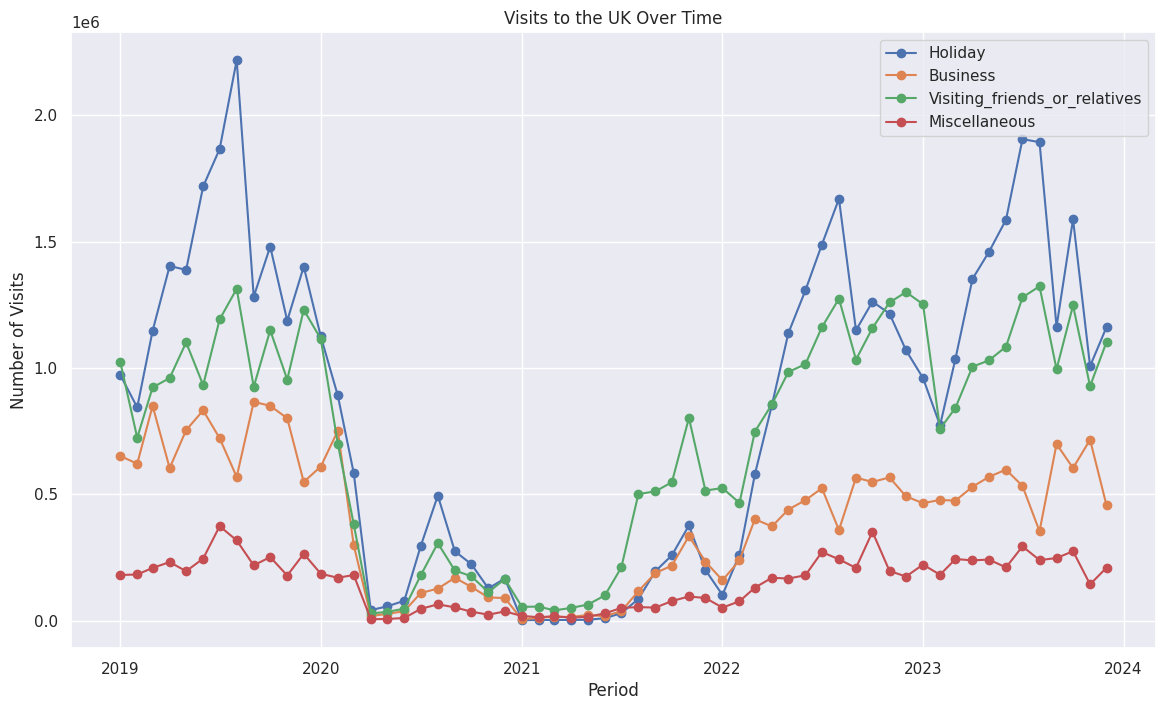

In [39]:
# What are most popular reasons for countries entering UK?
import matplotlib.pyplot as plt

# Plotting multiple columns.
plt.figure(figsize=(14, 8))

plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Holiday'], label='Holiday', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Business'], label='Business', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Visiting_friends_or_relatives'], label='Visiting_friends_or_relatives', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Miscellaneous'], label='Miscellaneous', marker='o')

# Customising the plot.
plt.xlabel('Period')
plt.ylabel('Number of Visits')
plt.title('Visits to the UK Over Time')
plt.legend()
plt.grid(True)
plt.show()


Typically, most people will visit the UK for holiday reasons, however there was a noticeable uptick in people visiting friends or relatives near the end of 2022, perhaps as a result of the COVID-19 pandemic meaning people were much more keen to see their distant family members. The amount of people visiting for business related reasons is relevantly consistent, but yet again dips and almost reaches a level of 0 during the pandemic due to flight restrictions or outright bans.

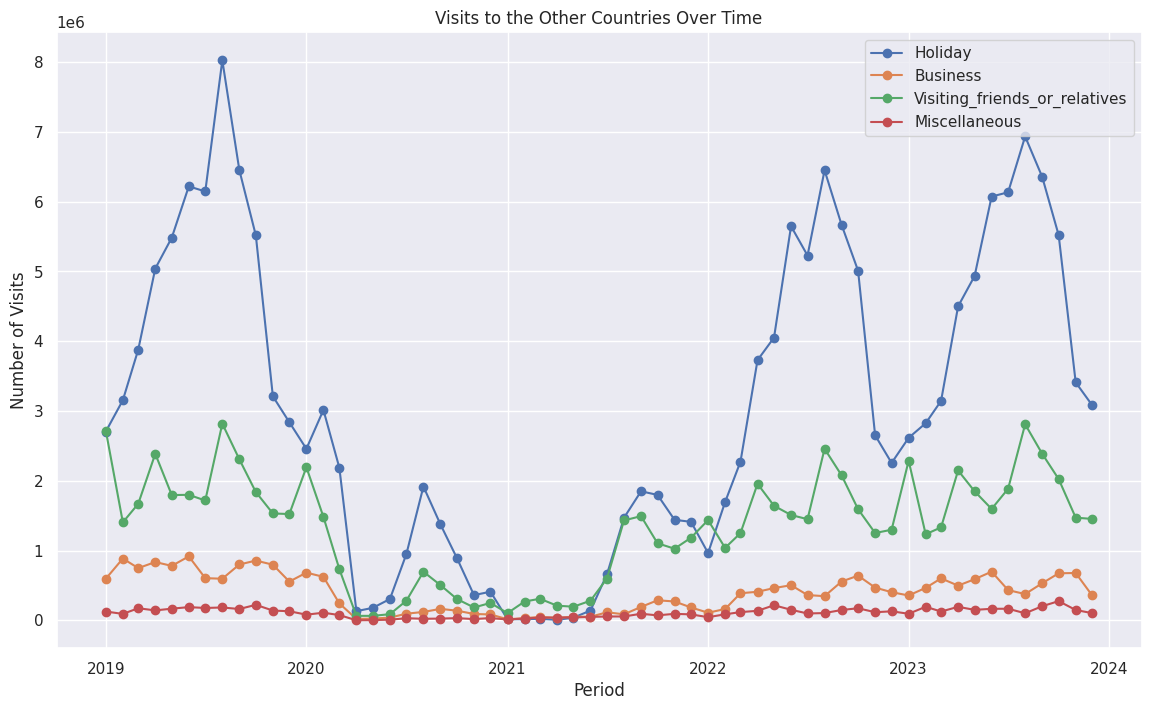

In [41]:
# What are most popular reasons for countries leaving UK?
import matplotlib.pyplot as plt

# Plotting multiple columns.
plt.figure(figsize=(14, 8))

plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Holiday'], label='Holiday', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Business'], label='Business', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Visiting_friends_or_relatives'], label='Visiting_friends_or_relatives', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Miscellaneous'], label='Miscellaneous', marker='o')

# Customising the plot.
plt.xlabel('Period')
plt.ylabel('Number of Visits')
plt.title('Visits to Other Countries Over Time')
plt.legend()
plt.grid(True)
plt.show()

Most commonly, UK residents will visit other countries for purposes of holiday - but during the pandemic, due to non-essential travel bans, the rate of holiday travel almost reached a full standstill.

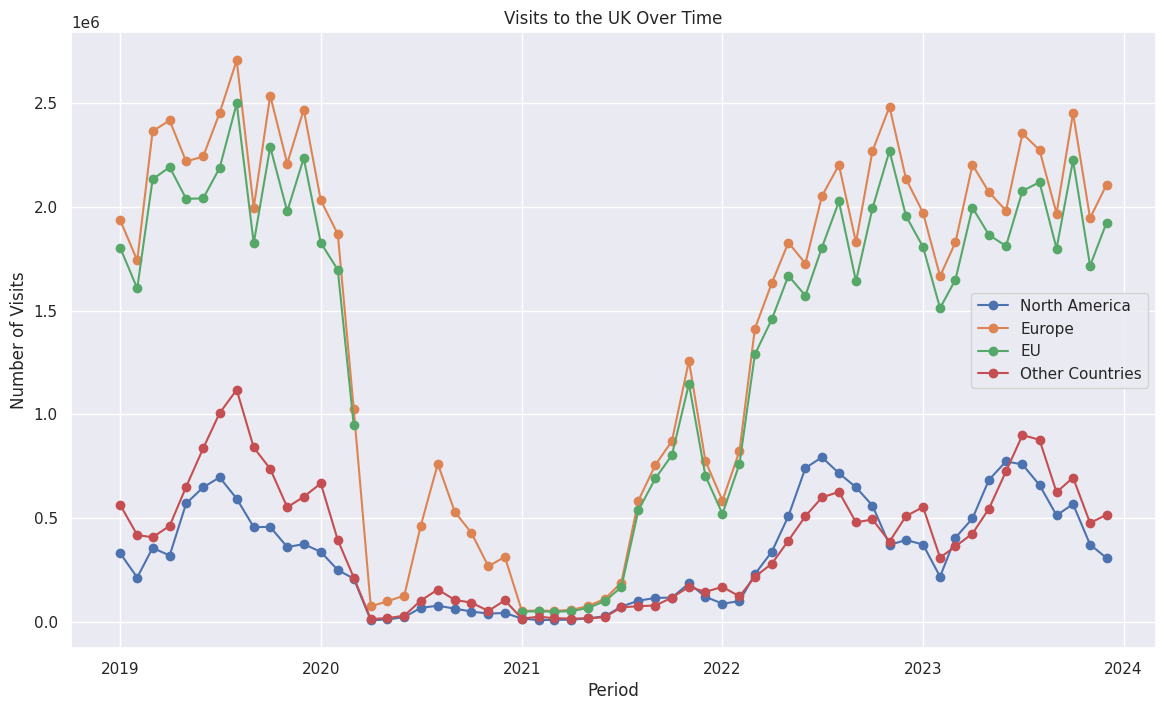

In [56]:
# Which countries do entrants come from?

import matplotlib.pyplot as plt

# Plotting multiple columns.
plt.figure(figsize=(14, 8))

plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['North_America'], label='North America', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Europe'], label='Europe', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['EU'], label='EU', marker='o')
plt.plot(pandas_VisitsToUK.index, pandas_VisitsToUK['Other_Countries'], label='Other Countries', marker='o')

# Customising the plot.
plt.xlabel('Period')
plt.ylabel('Number of Visits')
plt.title('Visits to the UK Over Time')
plt.legend()
plt.grid(True)
plt.show()

When reviewing the data, the most common area for visitors to the UK is Europe and the countries that make up the European Union. This is likely due to its closer proximity and therefore lower travel costs, with accessibility being a huge feature. Other countries are far less likely, including North America, which is likely due to the high travel times and the greatly increased costs. The time period values are also interesting, as there appears to be less travel restrictions from the rest of Europe compared to any other category, which could be due to policy.

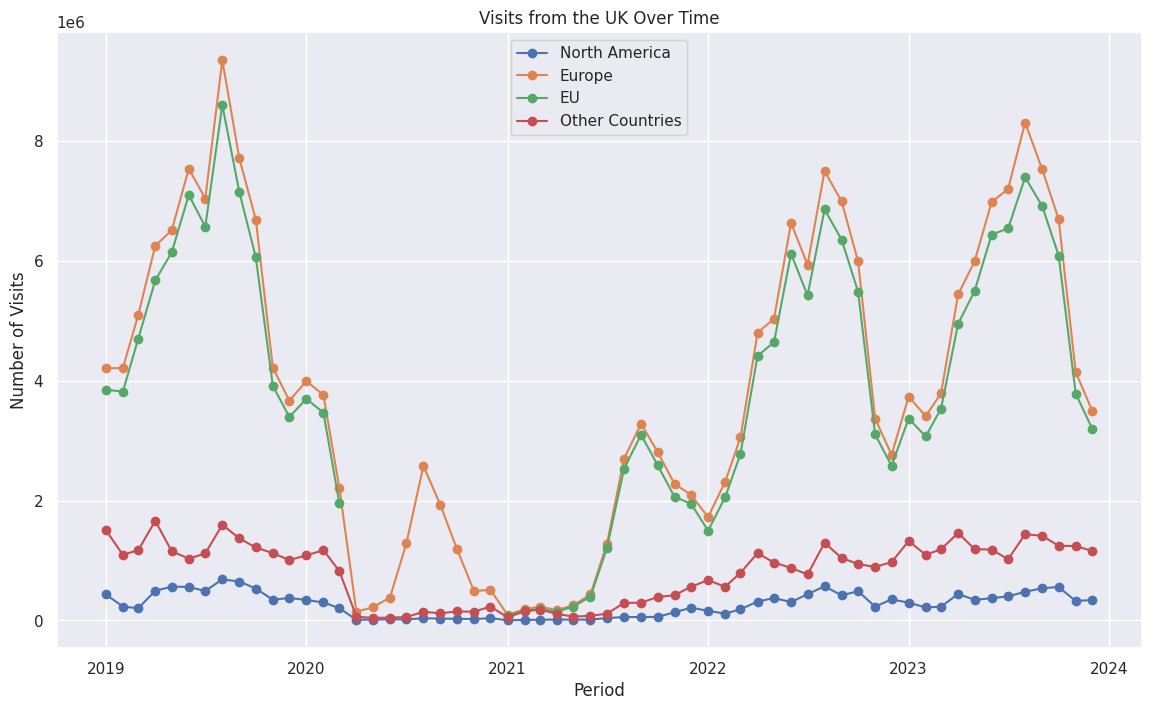

In [58]:
# Which countries do UK residents go to?
import matplotlib.pyplot as plt

# Plotting multiple columns.
plt.figure(figsize=(14, 8))

plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['North_America'], label='North America', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Europe'], label='Europe', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['EU'], label='EU', marker='o')
plt.plot(pandas_VisitsFromUK.index, pandas_VisitsFromUK['Other_Countries'], label='Other Countries', marker='o')

# Customising the plot.
plt.xlabel('Period')
plt.ylabel('Number of Visits')
plt.title('Visits from the UK Over Time')
plt.legend()
plt.grid(True)
plt.show()


UK residents seem to visit Europe the most out of any group, even during the pandemic period - which is again likely due to its much closer proximity. The figures between Europe and the European Union countries are similar due to the huge overlap in countries which are included in both - however the European Union contains some further away countries which may have impacted its result (further distance likely indicates higher prices, and the higher travel time is likely to disinterest travellers). The results may also be impacted due to some countries in Europe not being themselves part of the European Union, which decreases its numbers.

In [47]:
# What peak months do people enter?
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, quarter, year, sum as spark_sum

VisitsToUK = VisitsToUK.withColumn("Year", year(col("Period")))
VisitsToUK = VisitsToUK.withColumn("Quarter", quarter(col("Period")))

In [48]:
# Groups by Year and Quarter, and sums the totals.
quarterly_visits = VisitsToUK.groupBy("Year", "Quarter").agg(spark_sum("Total").alias("Total_Visits"))

# Converting to Pandas DataFrame.
pandas_df = quarterly_visits.toPandas()

# Combines Year and Quarter into a single column.
pandas_df['Year_Quarter'] = pandas_df['Year'].astype(str) + ' Q' + pandas_df['Quarter'].astype(str)

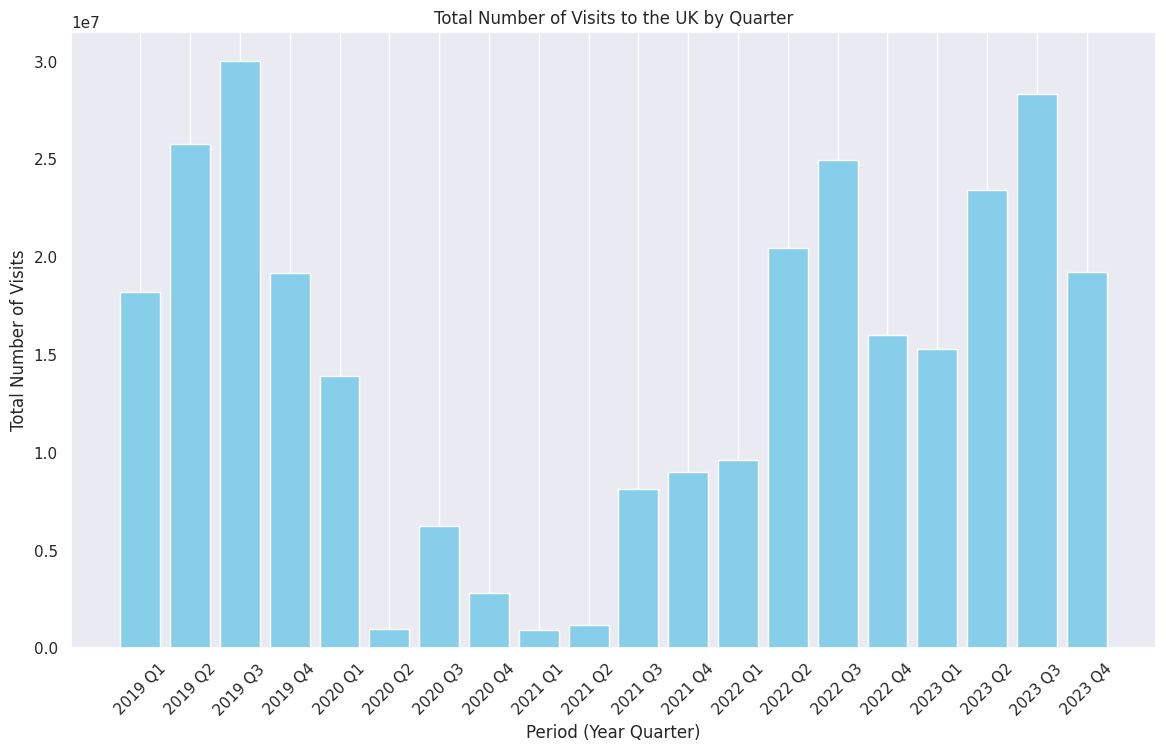

In [59]:
pandas_df.sort_values(by='Year_Quarter', inplace=True)

# Plotting data.
plt.figure(figsize=(14, 8))

# Creates bar chart.
plt.bar(pandas_df['Year_Quarter'], pandas_df['Total_Visits'], color='skyblue')

# Customising the plot.
plt.xlabel('Period (Year Quarter)')
plt.ylabel('Total Number of Visits')
plt.title('Total Number of Visits to the UK by Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Shows plot.
plt.show()

In [50]:
# What peak months do people leave?
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, quarter, year, sum as spark_sum

VisitsFromUK = VisitsFromUK.withColumn("Year", year(col("Period")))
VisitsFromUK = VisitsFromUK.withColumn("Quarter", quarter(col("Period")))

In [51]:
# Groups by Year and Quarter, and sums the totals.
quarterly_visits = VisitsFromUK.groupBy("Year", "Quarter").agg(spark_sum("Total").alias("Total_Visits"))

# Converts to Pandas DataFrame.
pandas_df = quarterly_visits.toPandas()

# Combines Year and Quarter into a single column.
pandas_df['Year_Quarter'] = pandas_df['Year'].astype(str) + ' Q' + pandas_df['Quarter'].astype(str)

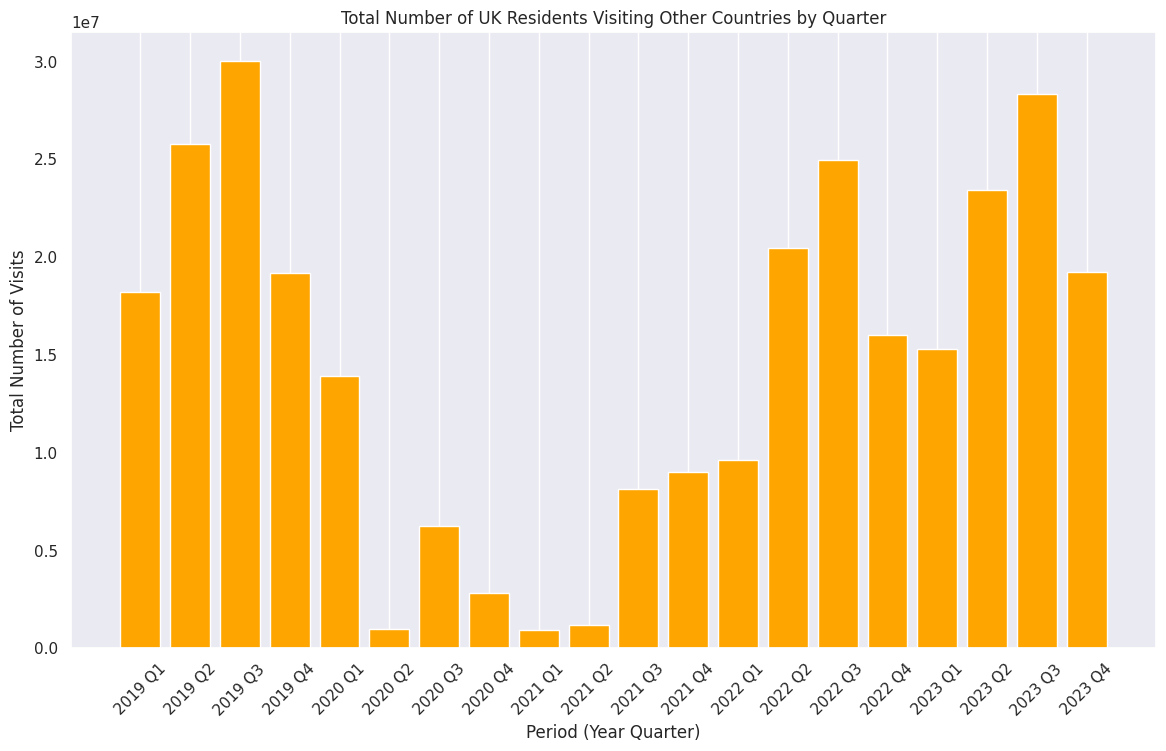

In [60]:
pandas_df.sort_values(by='Year_Quarter', inplace=True)

# Plotting data.
plt.figure(figsize=(14, 8))

# Creates bar chart.
plt.bar(pandas_df['Year_Quarter'], pandas_df['Total_Visits'], color='orange')

# Customising the plot.
plt.xlabel('Period (Year Quarter)')
plt.ylabel('Total Number of Visits')
plt.title('Total Number of UK Residents Visiting Other Countries by Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Shows the plot.
plt.show()

These graphs clearly indicate an overall trend which is highly indicative of COVID-19 being not only a UK resident impacting issue, but a global travel issue due to restrictions. This highlights their effectiveness, of which it is easy to hypothesise that the travel spend will be impacted also as a result.

In [75]:
# Performs a left join on the "Period" column.
VisitsToUKFinancial = VisitsToUK.join(FinancialData, on="Period", how="left")

# Shows the result.
VisitsToUKFinancial.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+----+-------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|  Total|Seasonally_Adjusted_Total|Year|Quarter|Overseas_Residents_Spending_in_UK|Seasonally_Adjusted_Overseas_Residents_Spending_in_UK|UK_Residents_Spending_Abroad|Seasonally_Adjusted_UK_Residents_Spending_Abroad|Balance|Seasonally_Adjusted_Balance|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+----

In [94]:
# Groups by Year and Quarter, and sums the totals.
quarterly_finance_in_uk = VisitsToUKFinancial.groupBy("Year", "Quarter").agg(spark_sum("Overseas_Residents_Spending_in_UK").alias("Total_Spending_in_UK"))

# Converts to Pandas DataFrame.
pandas_VisitsToUKFinancial = quarterly_finance_in_uk.toPandas()

# Combines Year and Quarter into a single column.
pandas_VisitsToUKFinancial['Year_Quarter'] = pandas_VisitsToUKFinancial['Year'].astype(str) + ' Q' + pandas_VisitsToUKFinancial['Quarter'].astype(str)

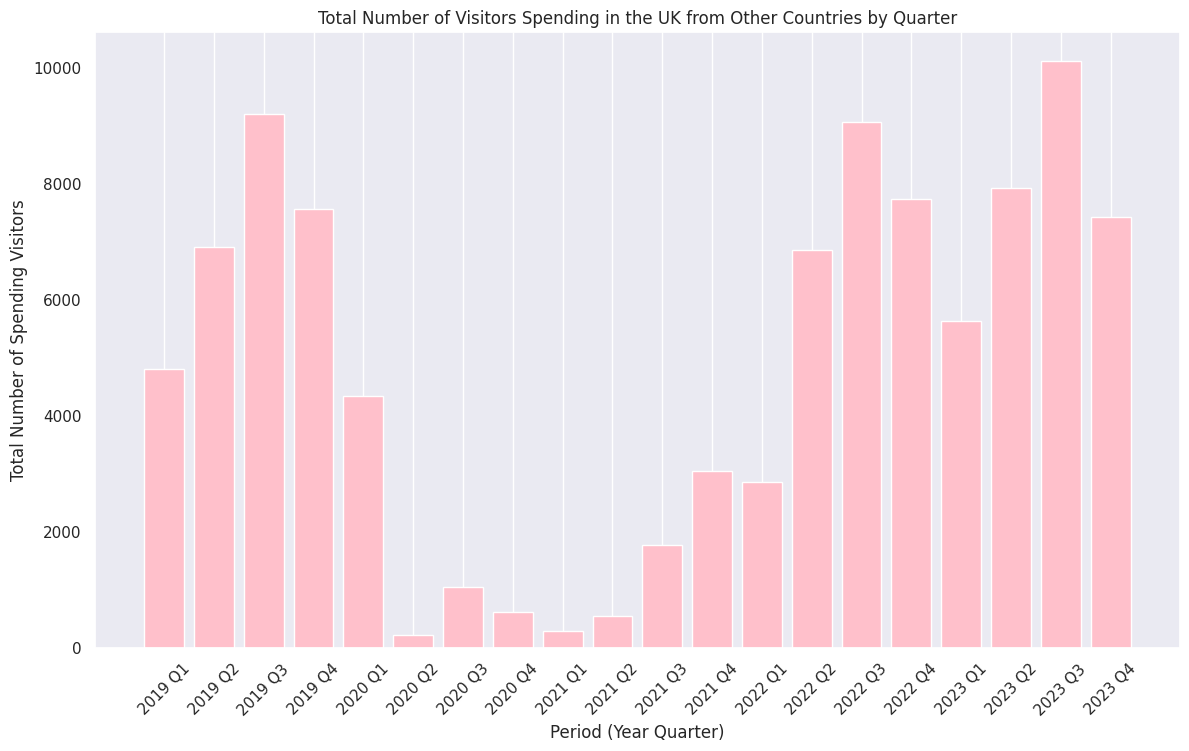

In [95]:
# Converts PySpark DataFrame to Pandas DataFrame.

pandas_VisitsToUKFinancial.sort_values(by='Year_Quarter', inplace=True)

# Plotting data.
plt.figure(figsize=(14, 8))

# Creates bar chart.
plt.bar(pandas_VisitsToUKFinancial['Year_Quarter'], pandas_VisitsToUKFinancial['Total_Spending_in_UK'], color='pink')

# Customising the plot.
plt.xlabel('Period (Year Quarter)')
plt.ylabel('Total Number of Spending Visitors')
plt.title('Total Number of Visitors Spending in the UK from Other Countries by Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Shows plot.
plt.show()

In [76]:
# Performs a left join on the "Period" column.
VisitsFromUKFinancial = VisitsFromUK.join(FinancialData, on="Period", how="left")

# Shows the result.
VisitsFromUKFinancial.show()

+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+-----------------------------+-------------+-------+-------------------------+----+-------+---------------------------------+-----------------------------------------------------+----------------------------+------------------------------------------------+-------+---------------------------+
|    Period|North_America| Europe|     EU|   EU15|Other_EU|Other_Countries|World_Total|Seasonally_Adjusted_World_Total|Holiday|Business|Visiting_friends_or_relatives|Miscellaneous|  Total|Seasonally_Adjusted_Total|Year|Quarter|Overseas_Residents_Spending_in_UK|Seasonally_Adjusted_Overseas_Residents_Spending_in_UK|UK_Residents_Spending_Abroad|Seasonally_Adjusted_UK_Residents_Spending_Abroad|Balance|Seasonally_Adjusted_Balance|
+----------+-------------+-------+-------+-------+--------+---------------+-----------+-------------------------------+-------+--------+----

In [99]:
# Groups by Year and Quarter, and sums the totals.
quarterly_finance_from_uk = VisitsFromUKFinancial.groupBy("Year", "Quarter").agg(spark_sum("Overseas_Residents_Spending_in_UK").alias("Total_Spending_from_UK"))

# Converts to Pandas DataFrame.
pandas_VisitsFromUKFinancial = quarterly_finance_from_uk.toPandas()

# Combines Year and Quarter into a single column.
pandas_VisitsFromUKFinancial['Year_Quarter'] = pandas_VisitsFromUKFinancial['Year'].astype(str) + ' Q' + pandas_VisitsFromUKFinancial['Quarter'].astype(str)

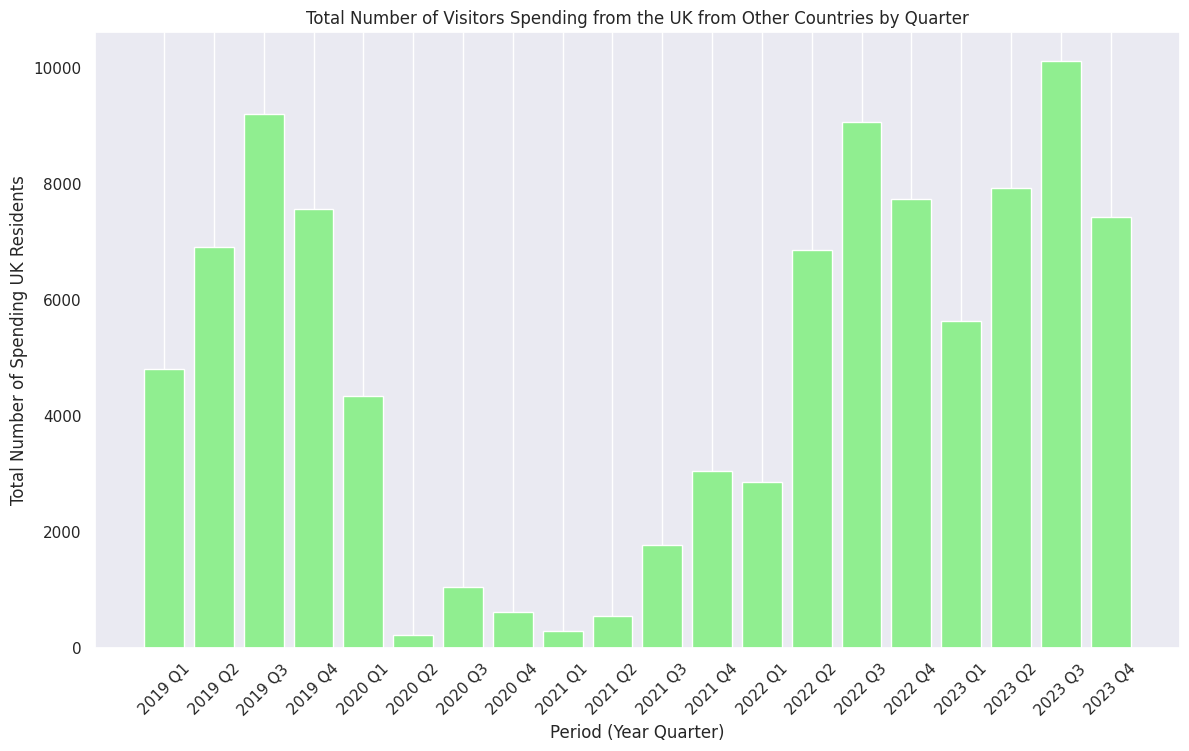

In [102]:
# Converts PySpark DataFrame to Pandas DataFrame.

pandas_VisitsFromUKFinancial.sort_values(by='Year_Quarter', inplace=True)

# Plotting data.
plt.figure(figsize=(14, 8))

# Creates bar chart.
plt.bar(pandas_VisitsFromUKFinancial['Year_Quarter'], pandas_VisitsFromUKFinancial['Total_Spending_from_UK'], color='lightgreen')

# Customising the plot.
plt.xlabel('Period (Year Quarter)')
plt.ylabel('Total Number of Spending UK Residents')
plt.title('Total Number of Visitors Spending from the UK from Other Countries by Quarter')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Shows plot.
plt.show()

Both graphs clearly indicate the impact of the COVID-19 pandemic not just for residents of the UK, but worldwide. There is a clear decrease in 2020 Q2 due to travel restrictions - however, interestingly, it is not a complete flat amount for either graph. This could be due to people staying in the UK for extended periods prior to the pandemic - for reasons of work, or visiting friends and family for long term, and thus being either stuck in the UK or stuck abroad, meaning they are still spending money there.

# Discussion

The data shows how drastically the COVID-19 pandemic affected travel. There was a significant drop in travel during the lockdowns in 2020, highlighting the industry's vulnerability to such global events. During the pandemic, there was an increase in people visiting friends and family, especially towards the end of 2022. This shift suggests that people prioritized personal connections over holidays or business trips during these times.


Despite the decline in travel, spending did not completely stop. This indicates some resilience in the travel industry, likely due to factors like flexible bookings and continued travel for essential reasons. Travel to and from Europe remained high, probably due to its proximity and lower travel costs. This shows how economic and political factors influence travel choices.

These findings are important for policymakers who need to understand travel trends to make informed decisions. The data can help shape policies to boost travel demand and support the industry’s recovery. Businesses in the travel sector can use these insights to adjust their strategies. Understanding travel trends and spending behaviors helps businesses meet new demands and mitigate risks.

The analysis has limitations, such as potential biases in the data. Future research should look at long-term trends, compare different regions, and include qualitative data to get a fuller picture of travel behaviors.

In summary, this critical discussion highlights the complexity of travel trends and their implications for the industry. By understanding these results, stakeholders can better navigate the challenges and opportunities in the travel sector.

# Conclusion

In conclusion, the analysis of UK travel data has provided valuable insights into travel trends, especially during the COVID-19 pandemic. There are visible significant changes in travel behaviour, with fewer people going on holidays or traveling for business.

European destinations remain popular among travelers, likely due to their proximity and ease of access. However, travel patterns vary based on factors like regulations, economic conditions, and geopolitical factors.

The graphs depicting travel trends serve as visual representations of the severe impact of COVID-19 on global travel, highlighting periods of significant disruption. Despite these challenges, the resilience of the travel industry and the adaptability of travelers are clear, suggesting potential opportunities for recovery and growth in the post-pandemic world.

Overall, this analysis helps us understand how travel is changing and informs decisions on policies and industry recovery efforts. By using this information, we can make better decisions about travel policies and support the travel industry as it recovers from the pandemic.



# References / Citations

*   Dataset: Overseas travel and tourism, monthly - Office for National Statistics (2024). https://www.ons.gov.uk/peoplepopulationandcommunity/leisureandtourism/datasets/monthlyoverseastravelandtourismreferencetables

*   Jessica Tate, Valorie A. Crooks and Jeremy Snyder (2024) ‘“We were leery of going”: qualitatively exploring Canadian international retirement migrants’ travel-related decisions during the COVID-19 pandemic’, Tropical Diseases, Travel Medicine and Vaccines, 10(1), pp. 1–10. doi:10.1186/s40794-024-00218-z.

*   Carlos Yepez and Walter Leimgruber (2024) ‘The evolving landscape of tourism, travel, and global trade since the Covid-19 pandemic’, Research in Globalization, 8(100207-). doi:10.1016/j.resglo.2024.100207.

*   Al-baghdadi, N. et al. (2019) ‘Structuring Time Series Data to Gain Insight into Agent Behaviour’, 2019 IEEE International Conference on Big Data (Big Data), Big Data (Big Data), 2019 IEEE International Conference on, pp. 5480–5490. doi:10.1109/BigData47090.2019.9006346.



** LINK TO GOOGLE COLAB: https://colab.research.google.com/drive/1uhfHCDI3REbr3DoGsJ9ycc-xztb7SCO2?usp=sharing **

